In [1]:
import geopandas as gpd
import pyarrow
import pandas as pd
import os

In [2]:

def write_file(filename, info):
  text_file = open(filename, "w")
  text_file.write(info)
  text_file.close()

In [2]:
target_2631 = pd.read_parquet('data/GPS.nosync/filter/Sonoma_2631_new', engine='pyarrow')

In [3]:
streets = gpd.read_file('data/GPS.nosync/Streets/Streets.shp')

In [39]:
target_2631.columns

Index(['utc_timestamp', 'caid', 'geo_hash', 'latitude', 'longitude',
       'utc_datetime', 'la_datetime', 'hour', 'lat_epsg_3857',
       'lon_epsg_3857'],
      dtype='object')

In [15]:
streets.columns

Index(['OBJECTID', 'StreetID', 'FromLeft', 'FromRight', 'ToLeft', 'ToRight',
       'PreDir', 'Name', 'Type', 'SufDir', 'LeftCity', 'RightCity', 'LeftZip',
       'RightZip', 'LeftMun', 'RightMun', 'Label', 'ClassCode', 'Class',
       'PubPriv', 'SurfaceTyp', 'CartoClass', 'XCoord', 'YCoord', 'Lat',
       'Long', 'last_edite', 'Shape__Len', 'geometry'],
      dtype='object')

In [40]:
streets['Label'].value_counts()

Hwy 116 N                           441
Stewarts Point Skaggs Springs Rd    400
Hwy 1                               392
Rockpile Rd                         361
Hwy 12                              305
                                   ... 
Zircon Pl                             1
Las Plumas Ct                         1
Circulo Taxco                         1
Topaz Ct                              1
Arroyo Ct                             1
Name: Label, Length: 8475, dtype: int64

In [13]:
streets['Class'].value_counts()

Local                   39094
Primary Arterial         4060
Major Collector          2724
Minor Collector          2503
Highway                  1558
Secondary Arterial       1518
Path Multi-Use           1188
Fire Road                1153
Path Pedestrian Only      442
Railway                   291
Freeway                   288
Interchange               242
Access Road                81
Agricultural Road          58
Alleyway                   36
Name: Class, dtype: int64

In [14]:
streets['ClassCode'].value_counts()

R1    39094
A1     4060
C1     2724
C2     2503
H1     1558
A2     1518
P1     1188
U1     1153
P2      442
T1      291
F1      288
I1      242
R2       81
U2       58
Y1       36
Name: ClassCode, dtype: int64

In [11]:
streets.columns

Index(['OBJECTID', 'StreetID', 'FromLeft', 'FromRight', 'ToLeft', 'ToRight',
       'PreDir', 'Name', 'Type', 'SufDir', 'LeftCity', 'RightCity', 'LeftZip',
       'RightZip', 'LeftMun', 'RightMun', 'Label', 'ClassCode', 'Class',
       'PubPriv', 'SurfaceTyp', 'CartoClass', 'XCoord', 'YCoord', 'Lat',
       'Long', 'last_edite', 'Shape__Len', 'geometry'],
      dtype='object')

In [24]:
speed_limits = pd.read_csv('data/GPS.nosync/Speed Surveys.csv')

In [43]:
speed_limits.columns

Index(['Road Name', 'Road ID', 'Lane Configuration', 'Travel Lane Width',
       'Paved Shoulder Width', 'Graded Shoulder Width', 'Surface Condition',
       'Parking', 'Driveways', 'Sidewalks', 'Terrain', 'School Zone',
       'Bike Route', 'Intersections', 'Posted Speed Limit',
       '85th Percentile Speed', 'PACE Range', 'Radar Date', 'Completed By',
       'Purpose', 'Postmile', 'Class', 'Lon', 'Lat', 'created_user',
       'created_date', 'last_edited_user', 'last_edited_date', 'x', 'y'],
      dtype='object')

<AxesSubplot:>

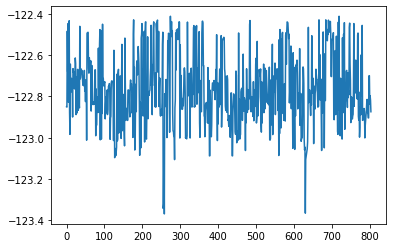

In [37]:
speed_limits['Lon'].plot()

In [35]:
speed_limits['Posted Speed Limit'].value_counts()

35.0    193
45.0    137
40.0    127
30.0    109
25.0     77
50.0     41
55.0     13
Name: Posted Speed Limit, dtype: int64

In [46]:
speed_limits['Road Name'].value_counts()

River Rd                      26
Arnold Dr                     25
Stewarts Pt Skaggs Springs    20
Occidental Rd                 17
Grove St                      14
                              ..
Stoetz Ln                      1
Red Winery Rd                  1
East Railroad Ave              1
Dutcher Creek Rd               1
Sunland Ave                    1
Name: Road Name, Length: 261, dtype: int64

In [49]:
speed_limits[speed_limits['Road Name'] == 'Llano Rd']

,Road Name,Road ID,Lane Configuration,Travel Lane Width,Paved Shoulder Width,Graded Shoulder Width,Surface Condition,Parking,Driveways,Sidewalks,...,Postmile,Class,Lon,Lat,created_user,created_date,last_edited_user,last_edited_date,x,y
123,Llano Rd,6805,NBSB,12,3-9,0-6,Good,"E,W","1-E, 5-W",NaN,...,10.37,MaC,-122.769139,38.363225,CGALANTI,"六月 27, 2017",TPW,"二月 14, 2019",6.341131e+06,1.895034e+06
332,Llano Rd,6805,"NB,SB",10,0-1,0-2,Fair,"E,W","11-E, 6-W",None,...,11.55,MaC,-122.768794,38.380256,STAGE,"七月 6, 2016",TPW,"二月 14, 2019",6.341282e+06,1.901235e+06
333,Llano Rd,6805,"NB,SB",12,1-4,0-4,Fair,"E,W","28-E, 11-W",None,...,13.84,MaC,-122.791566,38.406722,STAGE,"七月 6, 2016",TPW,"二月 14, 2019",6.334838e+06,1.910929e+06
656,Llano Rd,6805,"NB,SB",12,1-4,0-4,Fair,"E,W","15-E, 7-W",None,...,13.10,MaC,-122.783826,38.398076,STAGE,"七月 6, 2016",TPW,"二月 14, 2019",6.337029e+06,1.907761e+06
657,Llano Rd,6805,"NB,SB",10,0-1,0-2,Fair,"E,W","11-E, 4-W",None,...,11.33,MaC,-122.768775,38.377025,STAGE,"七月 6, 2016",TPW,"二月 14, 2019",6.341277e+06,1.900058e+06


In [48]:
speed_limits[speed_limits['Road Name'] == 'Llano Rd']['Posted Speed Limit']

123     NaN
332    45.0
333    50.0
656    50.0
657    45.0
Name: Posted Speed Limit, dtype: float64

<AxesSubplot:>

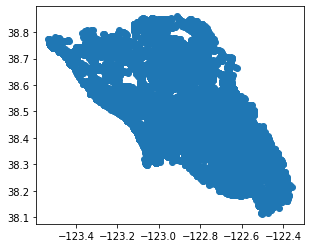

In [6]:
streets.boundary.plot()

In [46]:
_streets = gpd.read_file('data/GPS.nosync/_street_nodes_dual.shp')

<AxesSubplot:>

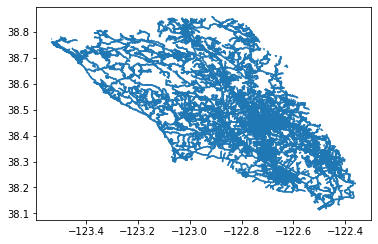

In [47]:
_streets.plot()

In [51]:
_streets_ = gpd.read_file('data/GPS.nosync/street_nodes_dual.shp')

<AxesSubplot:>

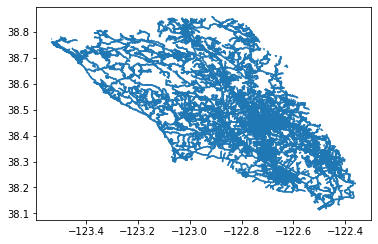

In [52]:
_streets.plot()

In [13]:
def show_points(filename, dataType):
  if os.path.isfile(filename):
    #open text file in read mode
    text_file = open(filename, "r")

    #read whole file to a string
    points = text_file.read()

    #close file
    text_file.close()
    data = {'col1': ['name1'], 'wkt': points}
    df = pd.DataFrame(data)
    gs = gpd.GeoSeries.from_wkt(df['wkt'])
    gdf = gpd.GeoDataFrame(df, geometry=gs, crs="EPSG:4326")
    #print(type(gs))
    if dataType == 2:
      tmp = gdf.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
      x_ = []
      y_ = []
      for data in tmp[0]:
        x_.append(data[0])
        y_.append(data[1])
      gdf = gpd.GeoDataFrame(
        pd.DataFrame(), geometry=gpd.points_from_xy(x=x_, y=y_))
    return gdf
  else:
    print("NO SUCH FILE")

def show_points_from_df(df, index, dataType):

    #read whole file to a string
    points = df.loc[index]["res"]
    #print(points)
    data = {'col1': ['name1'], 'wkt': points}
    df1 = pd.DataFrame(data)
    gs = gpd.GeoSeries.from_wkt(df1['wkt'])
    gdf = gpd.GeoDataFrame(df1, geometry=gs, crs="EPSG:4326")
    #print(type(gs))
    if dataType == 2:
      tmp = gdf.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
      x_ = []
      y_ = []
      for data in tmp[0]:
        x_.append(data[0])
        y_.append(data[1])
      gdf = gpd.GeoDataFrame(
        pd.DataFrame(), geometry=gpd.points_from_xy(x=x_, y=y_))
    return gdf


In [112]:
x_ = []
x_.append(1)
x_.append(2)
x_.append(3)
x_.append(4)
df = pd.DataFrame()
len(x_)
k = gpd.points_from_xy(x=x_, y=x_)
gdf = gpd.GeoDataFrame(
        df, geometry=k)
gdf

,geometry
0,POINT (1.00000 1.00000)
1,POINT (2.00000 2.00000)
2,POINT (3.00000 3.00000)
3,POINT (4.00000 4.00000)


In [130]:
file_path1 = "data/GPS.nosync/output/sub-result-23/23-m_wkt.txt"
gdf_wkt = show_points(file_path1,1)
file_path2 = "data/GPS.nosync/output/sub-result-23/23-e_wkt.txt"
gdf_ekt = show_points(file_path2,1)
file_path3 = "data/GPS.nosync/points/23-points.txt"
gdf_points = show_points(file_path3,2)

In [24]:
gdf_wkt = []
gdf_ekt = []
gdf_points = []
#index_list = [1332,1396,1472]
index_list = [370, 630, 831, 1000, 1269,1396]
df = pd.read_csv('data/GPS.nosync/Sonoma-2631-new-points/out2.csv')
#index_list = [4, 23, 187, 370, 497, 705, 831, 1000, 1061, 1536, 1592]
for i in index_list:
  print(i)
  line_base = "data/GPS.nosync/output/sub-result-"
  points_base = "data/GPS.nosync/points/"
  file_path1 = line_base + str(i) + '/' + str(i) + "-m_wkt.txt"
  gdf_wkt.append(show_points(file_path1,1))
  # file_path2 = line_base + str(i) + '/' + str(i) + "-e_wkt.txt"
  # gdf_ekt.append(show_points(file_path2,1))
  # file_path3 = points_base + str(i) + "-points.txt"
  # gdf_points.append(show_points(file_path3 ,2))
  gdf_points.append(show_points_from_df(df, i ,2))


370
630
831
1000
1269
1396


<AxesSubplot:>

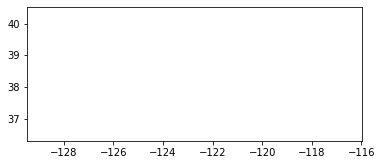

In [21]:
gdf_wkt[5]['geometry'].plot()

In [ ]:
index = 9
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(32, 32))
streets.plot(ax=ax, color='black', LineWidth = 2)
#gdf_ekt.plot(ax=ax, color='green',LineWidth = 2)
gdf_points[index].plot(ax=ax, color='blue', LineWidth = 1)
gdf_wkt[index].plot(ax=ax, color='red',LineWidth = 1)

<AxesSubplot:>

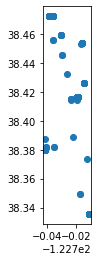

In [23]:
gdf_points[0].plot() 

In [25]:
import folium
from folium import plugins
for index in range(0,6):
    map2 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 16, min_zoom=8)

    for coord in gdf_points[index]['geometry']:
        folium.Marker( location=[ coord.y, coord.x ]).add_to( map2 )
    #plugins.HeatMap(heat_data).add_to(map)
    folium.Choropleth(
        gdf_wkt[index],
        line_weight=3,
        line_color='blue'
    ).add_to(map2)

    map2.save(str(index) + "tmp.html")
#map2[0]

In [ ]:
map3 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data3,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map3)
#plugins.HeatMap(heat_data).add_to(map)
map3


In [ ]:
map4 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data4,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map4)
#plugins.HeatMap(heat_data).add_to(map)
map4

In [ ]:
map5 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data3,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map5)
#plugins.HeatMap(heat_data).add_to(map)
map5

In [ ]:
map6 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data6,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map6)
#plugins.HeatMap(heat_data).add_to(map)
map6

In [ ]:
map7 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data7,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map7)
#plugins.HeatMap(heat_data).add_to(map)
map7

In [ ]:
map2.save("26-06-26-12.html")
map3.save("26-12-26-22.html")
map4.save("26-22-27-06.html")
map5.save("27-06-27-12.html")
map6.save("27-12-27-22.html")

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(64, 64))
streets.plot(ax=ax, color='black', LineWidth = 2)
gdf2.plot(ax=ax, color='green',LineWidth = 2)
#gdf.plot(ax=ax, color='blue', LineWidth = 1)
gdf1.plot(ax=ax, color='red',LineWidth = 1)

In [ ]:
# parts = streets[1:10000]
# parts['points'] = parts.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
# len(parts)
gdf2['points'] = gdf1.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
gdf1.head
gdf1

In [ ]:
import folium
map = folium.Map(location = [4,10], tiles = "Stamen Terrain", zoom_start = 3)

In [ ]:
from folium import plugins

map = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12)

#heat_data = [gdf2.points[0],gdf2.points[1]]
#heat_data[1] = 
heat_data = [[point[1], point[0]] for point in gdf2['points'][0] ]
# for point in gdf2['points'][1]:
#   heat_data.append([point[1],point[0]])
for points in gdf2['points']:
  for p in points:
    heat_data.append([p[1],p[0]])
heat_data
plugins.HeatMap(heat_data,min_opacity=0.5,
                   radius=4, blur=4, 
                   max_zoom=1).add_to(map)
map


In [ ]:
heat_data

In [ ]:
map.save("index-1-14-13-13.html")

In [ ]:
plugins.HeatMap(heat_data).add_to(map)
map